# Purpose

Of this notebook is to demonstrate some common usages of the `kulgap` package.

### Define a Collection

A collection is essentially is list of all of your timeseries data structured like:

In [1]:
import numpy as np

# import some data
control_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
control_obs_seqs = np.array([
    [186.98, 368.7, 488.45, 782.15, 924.55, 970.16, 1081.03],
    [267.6, 495.77, 628.39, 892.86, 984.88, 1096.8, 1314.03],
    [164.48, 265.19, 321.11, 429.37, 554.81, 602.29, 801.5],
    [201.21, 363.26, 443.48,660, 860.98, 961.62, 1005.79]
])

treatment_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
treatment_obs_seqs = np.array(
    [
        [118.82, 296.3, 465.59, 600.2, 482.71, 613.6, 408.73],
        [151.67, 264.68, 384.61, 370.35, 304.5, 311.43, 213.42],
        [127.3, 211.11, 270.17, 166.8, 87.16, 72.28, 54.18]
    ]
)

`control_obs_times` is the sequence of times at which measurements were taken for the control case. `control_obs_seqs` is the sequence**s** of the actual measurements taken at each individual time.

In [2]:
from kulgap.collection import Collection

control_collection = Collection(name="control", control_obs_times, control_obs_seqs)
treatment_collection = Collection(name="treatment", treatment_obs_times, treatment_obs_seqs)

INFO:kulgap.config:Normalizing data...
INFO:kulgap.config:Normalizing data...


### Calculate Metrics for the Collection

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

These are the supported metric types:

In [5]:
from kulgap.metrics import Metrics
Metrics.TYPES

('KL_DIVERGENCE',
 'KL_P_VALUE',
 'EMPIRICAL_KL',
 'MRECIST',
 'MRECIST_COUNTS',
 'RESPONSE_ANGLE',
 'RESPONSE_ANGLE_RELATIVE',
 'RESPONSE_ANGLE_AVERAGE',
 'RESPONSE_ANGLE_AVERAGE_RELATIVE',
 'AUC',
 'AUC_NORM',
 'AUC_GP',
 'DIRECTION',
 'CREDIBLE_INTERVALS',
 'PERCENT_CREDIBLE_INTERVALS',
 'RATES_LIST',
 'DELTA_LOG_LIKELIHOOD_H0_H1')

You need to pass into the Metrics the Collection on which you'd like to perform analysis on, and you're ready to calculate the metrics.

In [6]:
control_metrics = Metrics(collection=control_collection)
treatment_metrics = Metrics(collection=treatment_collection)

### KL Divergence

The main supported distance metric between two Gaussian processes.

In [7]:
treatment_metrics.kl_divergence(control_metrics)

INFO:kulgap.config:Currently no fit GP on treatment, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 24.679507527412888
Optimization restart 2/7, f = 32.57611537622191
Optimization restart 3/7, f = 24.679507527124102
Optimization restart 4/7, f = 24.679507527145745
Optimization restart 5/7, f = 24.679507527124102

INFO:kulgap.config:Currently no fit GP on control, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 6/7, f = 24.67950752744996
Optimization restart 7/7, f = 24.679507527119156
Optimization restart 1/7, f = -9.145489191420292
Optimization restart 2/7, f = -9.145489191512382
Optimization restart 3/7, f = -9.145489191493338
Optimization restart 4/7, f = 6.877799883213061


INFO:kulgap.config:Calculating the KL Divergence between treatment and control
INFO:kulgap.config:Calculated KL divergence is: 28.260228


Optimization restart 5/7, f = -9.145489191494327
Optimization restart 6/7, f = -9.145489191505945
Optimization restart 7/7, f = -9.145489191502095


28.260227786650212

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


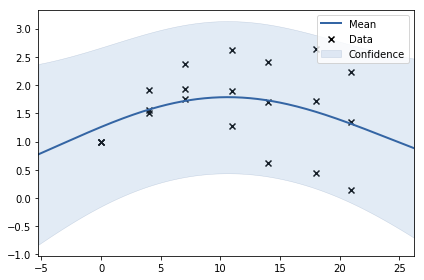

In [10]:
treatment_metrics.fit_gp.plot()

In [8]:
control_metrics.kl_divergence(treatment_metrics)

INFO:kulgap.config:Calculating the KL Divergence between control and treatment
INFO:kulgap.config:Calculated KL divergence is: 468.150849


468.1508493765417

Of course, KL divergence is not symmetric.

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


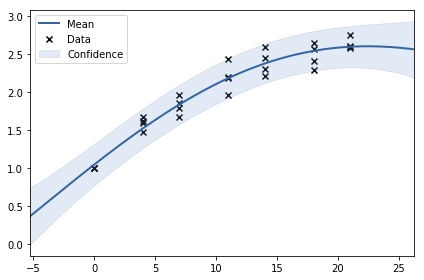

In [11]:
control_metrics.fit_gp.plot()

### Jensen Shannon Divergence

The symmetric version of KL divergence.

### P value for the observed KL divergence

In [9]:
treatment_metrics.kl_p_value(control_metrics)

INFO:kulgap.config:Processed 0 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.58369000329841
Optimization restart 2/7, f = 41.70602246425888
Optimization restart 3/7, f = 32.583690003310686
Optimization restart 4/7, f = 32.58369000358502
Optimization restart 5/7, f = 32.58369000375309
Optimization restart 6/7, f = 41.7060224830041


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 32.583690003302564
Optimization restart 1/7, f = -10.192852172589834
Optimization restart 2/7, f = 5.931897945310899
Optimization restart 3/7, f = 5.931897945302726
Optimization restart 4/7, f = -10.19285218191892
Optimization restart 5/7, f = -10.192852184317942
Optimization restart 6/7, f = 5.93189794555647
Optimization restart 7/7, f = -10.192852184258893


 /Users/wonjunetai/Documents/kulgap/kulgap/metrics.py:149: RuntimeWarning:invalid value encountered in log10
 /usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
INFO:kulgap.config:Processed 1 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.146051935023447
Optimization restart 2/7, f = 31.14605193475704
Optimization restart 3/7, f = 40.34498020700836


 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:35: RuntimeWarning:overflow encountered in square
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 31.14605193698821
Optimization restart 5/7, f = 40.3449802069801
Optimization restart 6/7, f = 40.34498020693526
Optimization restart 7/7, f = 31.146051934758034
Optimization restart 1/7, f = -3.057560892774138
Optimization restart 2/7, f = -3.0575608986797036
Optimization restart 3/7, f = -3.0575608977928113
Optimization restart 4/7, f = 12.635856868352738
Optimization restart 5/7, f = 12.635856868332503
Optimization restart 6/7, f = -3.0575608986801566
Optimization restart 7/7, f = -3.0575608985352005

INFO:kulgap.config:Processed 2 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 1/7, f = 30.71577253324233
Optimization restart 2/7, f = 40.008003196092076
Optimization restart 3/7, f = 40.008003107932325
Optimization restart 4/7, f = 30.71577253321636
Optimization restart 5/7, f = 40.00799682865023
Optimization restart 6/7, f = 40.00800319614686
Optimization restart 7/7, f = 30.715772534062687
Optimization restart 1/7, f = -9.284332883570308
Optimization restart 2/7, f = 6.903400259965396
Optimization restart 3/7, f = -9.284332881711968
Optimization restart 4/7, f = -9.284332883701897
Optimization restart 5/7, f = -9.284332883695114
Optimization restart 6/7, f = 6.90340025998562
Optimization restart 7/7, f = 6.903400259960296


INFO:kulgap.config:Processed 3 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.603501663769833
Optimization restart 2/7, f = 31.603501655744047
Optimization restart 3/7, f = 40.834121934424395
Optimization restart 4/7, f = 31.603501654637522
Optimization restart 5/7, f = 31.60350165459197


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 31.60350165461876
Optimization restart 7/7, f = 31.603501655037128
Optimization restart 1/7, f = -2.529952137309696
Optimization restart 2/7, f = -2.529952137320935
Optimization restart 3/7, f = -2.529952137315206
Optimization restart 4/7, f = 12.711477282787039
Optimization restart 5/7, f = -2.529952137312284
Optimization restart 6/7, f = 12.711477282787074
Optimization restart 7/7, f = 12.711477275508226


INFO:kulgap.config:Processed 4 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 15.652420615781082
Optimization restart 2/7, f = 15.65242061578066
Optimization restart 3/7, f = 28.17682732614771
Optimization restart 4/7, f = 28.176827336315366
Optimization restart 5/7, f = 28.17682732190144


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 15.652420615748468
Optimization restart 7/7, f = 15.65242061573538
Optimization restart 1/7, f = 25.412401326574646
Optimization restart 2/7, f = 34.16374257748357
Optimization restart 3/7, f = 34.1637425774876
Optimization restart 4/7, f = 25.41240132659519
Optimization restart 5/7, f = 25.412401648660975
Optimization restart 6/7, f = 25.412401326574702
Optimization restart 7/7, f = 25.41240133277865


INFO:kulgap.config:Processed 5 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 16.246128171567626
Optimization restart 2/7, f = 28.808349563911705
Optimization restart 3/7, f = 16.246128171537848


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 16.246128171538146
Optimization restart 5/7, f = 28.808349579340174
Optimization restart 6/7, f = 16.246128171538693
Optimization restart 7/7, f = 16.246128171608877
Optimization restart 1/7, f = 25.928570871592157
Optimization restart 2/7, f = 25.928570871648056
Optimization restart 3/7, f = 34.580949702004915
Optimization restart 4/7, f = 25.928570872769154
Optimization restart 5/7, f = 25.928570871391656
Optimization restart 6/7, f = 34.58094946426792
Optimization restart 7/7, f = 25.92857087504386


INFO:kulgap.config:Processed 6 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 16.004540969231822
Optimization restart 2/7, f = 16.004540969468156
Optimization restart 3/7, f = 16.004540988221493
Optimization restart 4/7, f = 16.004540970556963


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 28.634054547288486
Optimization restart 6/7, f = 28.63408582400284
Optimization restart 7/7, f = 16.004540969231854
Optimization restart 1/7, f = 24.982910518069215
Optimization restart 2/7, f = 24.98291051621097
Optimization restart 3/7, f = 24.982910516221224
Optimization restart 4/7, f = 24.982910516305004
Optimization restart 5/7, f = 33.783667401980594
Optimization restart 6/7, f = 33.78366740218155
Optimization restart 7/7, f = 33.78366740217782


INFO:kulgap.config:Processed 7 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.21621843848028
Optimization restart 2/7, f = 26.894253223463338
Optimization restart 3/7, f = 14.216218438444551
Optimization restart 4/7, f = 14.21621843848321
Optimization restart 5/7, f = 26.894253220175436
Optimization restart 6/7, f = 14.216218438486749
Optimization restart 7/7, f = 14.216218439869074

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 1/7, f = 27.160118289335614
Optimization restart 2/7, f = 27.160118289286928
Optimization restart 3/7, f = 35.62184406434914
Optimization restart 4/7, f = 27.160118289264375
Optimization restart 5/7, f = 27.160118295147957
Optimization restart 6/7, f = 27.160118289530335
Optimization restart 7/7, f = 27.160118292193182


INFO:kulgap.config:Processed 8 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.408355454001704
Optimization restart 2/7, f = 14.408355454008028
Optimization restart 3/7, f = 27.111349994171217
Optimization restart 4/7, f = 14.408355454002495
Optimization restart 5/7, f = 14.408355454009216


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 14.408355454045779
Optimization restart 7/7, f = 14.408355454048323
Optimization restart 1/7, f = 26.427504197529572
Optimization restart 2/7, f = 26.427504197517344
Optimization restart 3/7, f = 26.427504197759845
Optimization restart 4/7, f = 26.427504197163376
Optimization restart 5/7, f = 34.994670830988966
Optimization restart 6/7, f = 34.99466217277312
Optimization restart 7/7, f = 26.42750419725938


INFO:kulgap.config:Processed 9 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.788928386456588
Optimization restart 2/7, f = 14.788928386491921
Optimization restart 3/7, f = 14.788928386698483
Optimization restart 4/7, f = 27.56052741796408
Optimization restart 5/7, f = 27.560527231792207
Optimization restart 6/7, f = 27.560527417964572


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 14.788928386464166
Optimization restart 1/7, f = 26.84284864554173
Optimization restart 2/7, f = 26.842848645532314
Optimization restart 3/7, f = 26.88560711920386


 /usr/local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:38: RuntimeWarning:invalid value encountered in multiply


Optimization restart 4/7, f = 26.842848645968104
Optimization restart 5/7, f = 35.32930503278476
Optimization restart 6/7, f = 26.84284864553925
Optimization restart 7/7, f = 35.32930503270066


INFO:kulgap.config:Processed 10 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 33.4819212469808
Optimization restart 2/7, f = 42.79329375267672
Optimization restart 3/7, f = 42.793297574674156
Optimization restart 4/7, f = 33.4722140434443
Optimization restart 5/7, f = 42.79329788276668
Optimization restart 6/7, f = 42.79329788247784
Optimization restart 7/7, f = 42.79329788240358
Optimization restart 1/7, f = 11.193059767215008
Optimization restart 2/7, f = 11.193059768045746
Optimization restart 3/7, f = 23.74466963980963
Optimization restart 4/7, f = 11.193059767359513
Optimization restart 5/7, f = 11.193059767163263
Optimization restart 6/7, f = 11.19305976716305
Optimization restart 7/7, f = 23.74466964827446


INFO:kulgap.config:Processed 11 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 33.09660331263447
Optimization restart 2/7, f = 33.09660332202917
Optimization restart 3/7, f = 42.66135684044547
Optimization restart 4/7, f = 33.09660332257934
Optimization restart 5/7, f = 42.661362403587745
Optimization restart 6/7, f = 42.66136240439281


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 33.096603312584556
Optimization restart 1/7, f = 11.653591580694123
Optimization restart 2/7, f = 11.653591580650708
Optimization restart 3/7, f = 24.052297108963
Optimization restart 4/7, f = 24.05229710903056
Optimization restart 5/7, f = 24.05229710924297

INFO:kulgap.config:Processed 12 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 6/7, f = 24.052297108963145
Optimization restart 7/7, f = 24.052297108964858
Optimization restart 1/7, f = 33.53450418828418
Optimization restart 2/7, f = 43.08398666039531
Optimization restart 3/7, f = 43.08398665983463
Optimization restart 4/7, f = 43.083986658997304
Optimization restart 5/7, f = 33.53450419058416


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 33.53450418828382
Optimization restart 7/7, f = 33.53450418828271
Optimization restart 1/7, f = 10.350868309748154
Optimization restart 2/7, f = 22.93460312977197
Optimization restart 3/7, f = 10.35086830951647
Optimization restart 4/7, f = 10.350868309389767
Optimization restart 5/7, f = 10.350868309382907
Optimization restart 6/7, f = 10.350868309628435
Optimization restart 7/7, f = 22.934603129724202


INFO:kulgap.config:Processed 13 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.97883101765092
Optimization restart 2/7, f = 41.61559127976216
Optimization restart 3/7, f = 41.61559112737853
Optimization restart 4/7, f = 31.97883101351001
Optimization restart 5/7, f = 41.61559127195617
Optimization restart 6/7, f = 31.97883101374027

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 7/7, f = 41.615590050416884
Optimization restart 1/7, f = 13.950601448952112
Optimization restart 2/7, f = 13.950601448974927
Optimization restart 3/7, f = 13.95060146389601
Optimization restart 4/7, f = 13.950601448954608
Optimization restart 5/7, f = 25.979936738810018
Optimization restart 6/7, f = 13.950601448982205
Optimization restart 7/7, f = 13.950601448952082


INFO:kulgap.config:Processed 14 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.56012719549813
Optimization restart 2/7, f = 42.16353428013767
Optimization restart 3/7, f = 32.56012719550374
Optimization restart 4/7, f = 42.16354732280324
Optimization restart 5/7, f = 32.56012719549778

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 6/7, f = 32.560127195500684
Optimization restart 7/7, f = 32.5601272179535
Optimization restart 1/7, f = 13.446419096721833
Optimization restart 2/7, f = 13.44641909887058
Optimization restart 3/7, f = 13.446419096178694
Optimization restart 4/7, f = 13.446419096179184
Optimization restart 5/7, f = 25.52139603688689
Optimization restart 6/7, f = 25.521396036904502
Optimization restart 7/7, f = 13.44641909636031


INFO:kulgap.config:Processed 15 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.301452344357344
Optimization restart 2/7, f = 41.969308557723366
Optimization restart 3/7, f = 32.30145234434984
Optimization restart 4/7, f = 41.96930855774963
Optimization restart 5/7, f = 41.96930855771187
Optimization restart 6/7, f = 32.3014523443389


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 32.30145234471387
Optimization restart 1/7, f = 13.527199866675497
Optimization restart 2/7, f = 25.534089110145665
Optimization restart 3/7, f = 25.534088819939946
Optimization restart 4/7, f = 25.53409061034442
Optimization restart 5/7, f = 13.527199866687473
Optimization restart 6/7, f = 25.534090610337202
Optimization restart 7/7, f = 25.53409061033116


INFO:kulgap.config:Processed 16 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 2.2739910660468503
Optimization restart 2/7, f = 16.97042160107189
Optimization restart 3/7, f = 2.2739910660474276
Optimization restart 4/7, f = 2.2739910660475147
Optimization restart 5/7, f = 16.970421591586998
Optimization restart 6/7, f = 16.970420735993237


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 16.970421161925405
Optimization restart 1/7, f = 24.0104511155673
Optimization restart 2/7, f = 23.631017677984524
Optimization restart 3/7, f = 32.32694424432367
Optimization restart 4/7, f = 24.010451115590946

INFO:kulgap.config:Processed 17 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 5/7, f = 32.32694368445915
Optimization restart 6/7, f = 24.010451118724927
Optimization restart 7/7, f = 32.32694424434213
Optimization restart 1/7, f = 26.56490569704311
Optimization restart 2/7, f = 12.955369570466388
Optimization restart 3/7, f = 12.955369570181153


 /usr/local/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = -2.297890446032813
Optimization restart 5/7, f = 12.955369570177645
Optimization restart 6/7, f = -2.297890446019899
Optimization restart 7/7, f = -2.2978904460299656
Optimization restart 1/7, f = 22.059699379652358
Optimization restart 2/7, f = 31.04107890289385
Optimization restart 3/7, f = 22.059699768850948
Optimization restart 4/7, f = 22.05969917328891
Optimization restart 5/7, f = 31.04107906746215
Optimization restart 6/7, f = 31.041078551188697


INFO:kulgap.config:Processed 18 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 22.059930222619528
Optimization restart 1/7, f = 26.820971481411192
Optimization restart 2/7, f = 17.118119640450338
Optimization restart 3/7, f = 17.118120837140722
Optimization restart 4/7, f = 17.118120655098597
Optimization restart 5/7, f = 17.118119368406518
Optimization restart 6/7, f = 2.0742507799636893

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 7/7, f = 2.074250779812143
Optimization restart 1/7, f = 23.403781967704326
Optimization restart 2/7, f = 23.403781968823345
Optimization restart 3/7, f = 31.73637298313942
Optimization restart 4/7, f = 23.403781967800384
Optimization restart 5/7, f = 31.73637298318735
Optimization restart 6/7, f = 31.73637298317213


INFO:kulgap.config:Processed 19 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 23.403781967727582
Optimization restart 1/7, f = 0.5903924786093722
Optimization restart 2/7, f = 0.5903924786798527


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 3/7, f = 0.5903924785933619
Optimization restart 4/7, f = 0.5903924785887185
Optimization restart 5/7, f = 0.5903924788651498
Optimization restart 6/7, f = 0.5903924786444339
Optimization restart 7/7, f = 15.604832056887343
Optimization restart 1/7, f = 25.355502603215008
Optimization restart 2/7, f = 33.45321753701268
Optimization restart 3/7, f = 33.453211740843784
Optimization restart 4/7, f = 25.00727420378967
Optimization restart 5/7, f = 25.355502602112587
Optimization restart 6/7, f = 25.355502602118857
Optimization restart 7/7, f = 33.45321764485904


INFO:kulgap.config:Processed 20 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.999097960027044
Optimization restart 2/7, f = 31.59045515217231
Optimization restart 3/7, f = 41.03115092791589
Optimization restart 4/7, f = 41.03115109180791
Optimization restart 5/7, f = 31.590455152411145


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 31.590455152962086
Optimization restart 7/7, f = 41.03115109180821
Optimization restart 1/7, f = 4.506678260431276
Optimization restart 2/7, f = 18.658045027452523
Optimization restart 3/7, f = 4.5066782620902615
Optimization restart 4/7, f = 4.506678260323348
Optimization restart 5/7, f = 18.65803972725921
Optimization restart 6/7, f = 4.506678260299886
Optimization restart 7/7, f = 4.506678260350682


INFO:kulgap.config:Processed 21 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.10307180997595
Optimization restart 2/7, f = 40.64266447726125
Optimization restart 3/7, f = 31.10307180938366
Optimization restart 4/7, f = 40.64266880003952
Optimization restart 5/7, f = 31.10307180937725
Optimization restart 6/7, f = 40.64266880003909

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 7/7, f = 40.642668800055944
Optimization restart 1/7, f = 1.3680555027129024
Optimization restart 2/7, f = 1.3680555029321297
Optimization restart 3/7, f = 15.758336211173848
Optimization restart 4/7, f = 15.758336203711908
Optimization restart 5/7, f = 1.3680555027134318
Optimization restart 6/7, f = 1.3680555027122558
Optimization restart 7/7, f = 1.368055502712215


INFO:kulgap.config:Processed 22 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.997859371059135
Optimization restart 2/7, f = 31.997859370612304
Optimization restart 3/7, f = 31.997859370271634
Optimization restart 4/7, f = 31.997859374990064
Optimization restart 5/7, f = 31.997859370361258


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 41.45686060419858
Optimization restart 7/7, f = 31.99785937027229
Optimization restart 1/7, f = 4.347971944869711
Optimization restart 2/7, f = 18.212788316621733
Optimization restart 3/7, f = 4.347971944883822
Optimization restart 4/7, f = 4.347971944876946
Optimization restart 5/7, f = 4.347971944865954
Optimization restart 6/7, f = 4.347971944866281
Optimization restart 7/7, f = 4.347971944875432


INFO:kulgap.config:Processed 23 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 29.27978716633929
Optimization restart 2/7, f = 38.98677643388082
Optimization restart 3/7, f = 29.279787164311962
Optimization restart 4/7, f = 38.98677093193933
Optimization restart 5/7, f = 29.279787164273888


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 29.279787164228367
Optimization restart 7/7, f = 29.279787164359902
Optimization restart 1/7, f = 0.9710370924170668
Optimization restart 2/7, f = 15.68429283430507
Optimization restart 3/7, f = 0.9710370924139919
Optimization restart 4/7, f = 0.9710370924305636
Optimization restart 5/7, f = 15.684294120058244
Optimization restart 6/7, f = 0.9710370924139866
Optimization restart 7/7, f = 0.9710370924493876


INFO:kulgap.config:Processed 24 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 30.415675728097554
Optimization restart 2/7, f = 30.41567573115753
Optimization restart 3/7, f = 40.014258411787424
Optimization restart 4/7, f = 30.415675727685407
Optimization restart 5/7, f = 40.01425846460779
Optimization restart 6/7, f = 30.41567572767149


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 30.415675727403553
Optimization restart 1/7, f = 5.550912144722119
Optimization restart 2/7, f = 5.550912144632658
Optimization restart 3/7, f = 5.550912144628766
Optimization restart 4/7, f = 19.454167066676533
Optimization restart 5/7, f = 5.550912144556289
Optimization restart 6/7, f = 5.550912144659119
Optimization restart 7/7, f = 5.550912144556333


INFO:kulgap.config:Processed 25 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 29.809935429852658
Optimization restart 2/7, f = 29.809935431697895
Optimization restart 3/7, f = 29.809935428934452
Optimization restart 4/7, f = 29.80993542894894


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 29.809935428934438
Optimization restart 6/7, f = 39.529420684943055
Optimization restart 7/7, f = 29.80993542893428
Optimization restart 1/7, f = 1.5788069268099356
Optimization restart 2/7, f = 1.5788069268084648
Optimization restart 3/7, f = 1.5788069291464684
Optimization restart 4/7, f = 15.798410044520384
Optimization restart 5/7, f = 15.798410044482722
Optimization restart 6/7, f = 1.5788069268645373
Optimization restart 7/7, f = 1.5788069268903957


INFO:kulgap.config:Processed 26 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 13.415989278716731
Optimization restart 2/7, f = 26.647415992591007
Optimization restart 3/7, f = 13.41598927830768
Optimization restart 4/7, f = 26.647415992600852
Optimization restart 5/7, f = 26.647415992594862
Optimization restart 6/7, f = 13.415989278721
Optimization restart 7/7, f = 26.647410031490683
Optimization restart 1/7, f = 27.077620237494564
Optimization restart 2/7, f = 26.97314976211566
Optimization restart 3/7, f = 27.077620236509958
Optimization restart 4/7, f = 27.077620236390665
Optimization restart 5/7, f = 35.282763416853825
Optimization restart 6/7, f = 35.282763392967425
Optimization restart 7/7, f = 27.077620236409096

INFO:kulgap.config:Processed 27 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 1/7, f = 13.73549987036435
Optimization restart 2/7, f = 13.735499870613966
Optimization restart 3/7, f = 13.735499870372742
Optimization restart 4/7, f = 13.735499870363272


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 13.73549987118477
Optimization restart 6/7, f = 26.988030978288357
Optimization restart 7/7, f = 13.73549987037111
Optimization restart 1/7, f = 26.197571532937914
Optimization restart 2/7, f = 34.65984307519911
Optimization restart 3/7, f = 34.659842667352144
Optimization restart 4/7, f = 34.65984307548902
Optimization restart 5/7, f = 26.19752503836512
Optimization restart 6/7, f = 26.19753588163218
Optimization restart 7/7, f = 34.6598430749446


INFO:kulgap.config:Processed 28 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 26.022143971450284
Optimization restart 2/7, f = 13.884058203340931
Optimization restart 3/7, f = 13.884058203073774
Optimization restart 4/7, f = 13.88405820307389


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 13.884058203109067
Optimization restart 6/7, f = 13.884058204215595
Optimization restart 7/7, f = 27.177242553189238
Optimization restart 1/7, f = 26.75339916515904
Optimization restart 2/7, f = 34.943990432585295
Optimization restart 3/7, f = 34.943990432587114
Optimization restart 4/7, f = 26.753399158919958
Optimization restart 5/7, f = 26.753399168240314
Optimization restart 6/7, f = 26.599681806836692
Optimization restart 7/7, f = 34.94399043258382


INFO:kulgap.config:Processed 29 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 24.19177886704236
Optimization restart 2/7, f = 11.028545098732998
Optimization restart 3/7, f = 24.64922955629779
Optimization restart 4/7, f = 11.0285450987386
Optimization restart 5/7, f = 24.64922955742331


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 24.64922955799699
Optimization restart 7/7, f = 24.649229557610187
Optimization restart 1/7, f = 27.800616637346018
Optimization restart 2/7, f = 27.800616630562637
Optimization restart 3/7, f = 35.90756682358788
Optimization restart 4/7, f = 27.738487330539165
Optimization restart 5/7, f = 35.90756682358811
Optimization restart 6/7, f = 35.907566823588766
Optimization restart 7/7, f = 35.907566677580505


INFO:kulgap.config:Processed 30 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.99247362112182
Optimization restart 2/7, f = 31.992473621070374
Optimization restart 3/7, f = 41.857543773541366
Optimization restart 4/7, f = 31.992473621077714


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 31.992473621019915
Optimization restart 6/7, f = 41.857543773495124
Optimization restart 7/7, f = 41.85754377349173
Optimization restart 1/7, f = 14.081411180634182
Optimization restart 2/7, f = 25.62294498563879
Optimization restart 3/7, f = 25.622944993005937
Optimization restart 4/7, f = 14.08141118063312
Optimization restart 5/7, f = 14.081411180633092
Optimization restart 6/7, f = 14.081411180729459
Optimization restart 7/7, f = 14.081411180717872


INFO:kulgap.config:Processed 31 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.599590138378794
Optimization restart 2/7, f = 32.59958997367678
Optimization restart 3/7, f = 32.599589973699466
Optimization restart 4/7, f = 42.42188240931721
Optimization restart 5/7, f = 32.93890412159478
Optimization restart 6/7, f = 32.59958997417143


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 32.59958997369115
Optimization restart 1/7, f = 13.706365775472605
Optimization restart 2/7, f = 25.271135349339797
Optimization restart 3/7, f = 13.706365775645397
Optimization restart 4/7, f = 25.271133853530994

INFO:kulgap.config:Processed 32 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 5/7, f = 13.706365775985558
Optimization restart 6/7, f = 25.271134624220082
Optimization restart 7/7, f = 25.27113534933867
Optimization restart 1/7, f = 32.28907102753433
Optimization restart 2/7, f = 32.66658932071921
Optimization restart 3/7, f = 42.17083728665848

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 4/7, f = 32.289071027482265
Optimization restart 5/7, f = 42.170837286659115
Optimization restart 6/7, f = 42.17083728344072
Optimization restart 7/7, f = 32.28907102748181
Optimization restart 1/7, f = 13.506746395606813
Optimization restart 2/7, f = 13.506746395927076
Optimization restart 3/7, f = 13.506746395597396
Optimization restart 4/7, f = 24.991601709827012
Optimization restart 5/7, f = 13.506746395599317
Optimization restart 6/7, f = 24.991601710395614
Optimization restart 7/7, f = 13.506746396680686


INFO:kulgap.config:Processed 33 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.01825791654091
Optimization restart 2/7, f = 41.027839293944915
Optimization restart 3/7, f = 31.018257838085546
Optimization restart 4/7, f = 41.02783929454674
Optimization restart 5/7, f = 31.01825783803673
Optimization restart 6/7, f = 31.01825783801494


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 41.027839293914425
Optimization restart 1/7, f = 15.162241457288731
Optimization restart 2/7, f = 15.162241457300379
Optimization restart 3/7, f = 15.16224145772191
Optimization restart 4/7, f = 15.162241457288665
Optimization restart 5/7, f = 15.162241457291815
Optimization restart 6/7, f = 26.53011356445684
Optimization restart 7/7, f = 15.162241457287992


INFO:kulgap.config:Processed 34 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = -9.145489191468181
Optimization restart 2/7, f = -9.145489191495608
Optimization restart 3/7, f = -9.145489191504844
Optimization restart 4/7, f = -9.145489191508258
Optimization restart 5/7, f = -9.14548919135246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = -9.145489191511986
Optimization restart 7/7, f = -9.145489191512485
Optimization restart 1/7, f = 24.679507543513644
Optimization restart 2/7, f = 24.67950752726356
Optimization restart 3/7, f = 32.576114933606846
Optimization restart 4/7, f = 24.67950752740814
Optimization restart 5/7, f = 24.679507527119547
Optimization restart 6/7, f = 24.679507527120812
Optimization restart 7/7, f = 32.57611537622162

INFO:kulgap.config:Calculating the KL Divergence between treatment and control
INFO:kulgap.config:Calculated KL divergence is: 28.260228
INFO:kulgap.config:The calculated p value for treatment is: 0.027778.


0.027777777777777776

### Angles

A line of best fit, fit using ordinary least squares.

### AUC

Area under the curve metric

### MRECIST (Modified Response Evaluation Criteria in Solid Tumors)

Because this package was built for comparing tumour growths in patient-derived xenografts, we natively provide this metric.

### Credible Intervals

And all of the derivatives from credible intervals...

### GP Derivatives